In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from commando import ComManDo
from commando.evaluation import generate_figure, test_partial
import matplotlib.pyplot as plt
from mmd_wrapper import mmd_combine
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

2022-03-15 18:59:37.141260: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-15 18:59:37.141294: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
data1 = np.loadtxt("../data/UnionCom/scGEM/GeneExpression.txt")
data2 = np.loadtxt("../data/UnionCom/scGEM/DNAmethylation.txt")
type1 = np.loadtxt("../data/UnionCom/scGEM/type1.txt")
type2 = np.loadtxt("../data/UnionCom/scGEM/type2.txt")
type1 = type1.astype(np.int)
type2 = type2.astype(np.int)

# Sampling
# idx = np.random.choice(range(data1.shape[0]), 50, replace=False)
# data1, data2, type1, type2 = (x[idx] for x in (data1, data2, type1, type2))

# Labels
type_func = lambda x: {1:'BJ', 2:'d8', 3:'d16T+', 4:'d24T+', 5:'IPS'}[x]
labels = [np.array([type_func(j) for j in i]) for i in (type1,type2)]

# Preprocessing
data1 = preprocessing.normalize(data1, axis=0)
data2 = preprocessing.normalize(data2, axis=0)
dataset = [data1, data2]

# ComManDo

In [4]:
cm = ComManDo(output_dim=2)
cm_data = cm.fit_transform(dataset=dataset)

use random seed: 666
Shape of Raw data
Dataset 0: (177, 34)
Dataset 1: (177, 27)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[100/2000] err:2.4090 alpha:2.6255
epoch:[200/2000] err:2.0622 alpha:2.7893
epoch:[300/2000] err:1.4579 alpha:3.0570
epoch:[400/2000] err:1.2684 alpha:3.1888
epoch:[500/2000] err:1.2122 alpha:3.2375
epoch:[600/2000] err:1.1854 alpha:3.2610
epoch:[700/2000] err:1.1694 alpha:3.2764
epoch:[800/2000] err:1.1587 alpha:3.2889
epoch:[900/2000] err:1.1512 alpha:3.2998
epoch:[1000/2000] err:1.1454 alpha:3.3097
epoch:[1100/2000] err:1.1405 alpha:3.3186
epoch:[1200/2000] err:1.1360 alpha:3.3267
epoch:[1300/2000] err:1.1314 alpha:3.3341
epoch:[1400/2000] err:1.1262 alpha:3.3408
epoch:[1500/2000] err:1.1199 alpha:3.3471
epoch:[1600/2000] err:1.1118 alpha:3.3529
epoch:[1700/2000] err:1.1012 alpha:3.3586
epoch:[1800/2000] err:1.0888 alpha:3.3642
epoch:[1900/2000] err:1.0755 alpha:3.3695
epoch:[2000/2000] err:1.0626 alp

# UnionCom

In [5]:
uc = ComManDo(project_mode='tsne', output_dim=2)
uc_data = uc.fit_transform(dataset=dataset)

use random seed: 666
Shape of Raw data
Dataset 0: (177, 34)
Dataset 1: (177, 27)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[100/2000] err:2.4090 alpha:2.6255
epoch:[200/2000] err:2.0622 alpha:2.7893
epoch:[300/2000] err:1.4579 alpha:3.0570
epoch:[400/2000] err:1.2684 alpha:3.1888
epoch:[500/2000] err:1.2122 alpha:3.2375
epoch:[600/2000] err:1.1854 alpha:3.2610
epoch:[700/2000] err:1.1694 alpha:3.2764
epoch:[800/2000] err:1.1587 alpha:3.2889
epoch:[900/2000] err:1.1512 alpha:3.2998
epoch:[1000/2000] err:1.1454 alpha:3.3097
epoch:[1100/2000] err:1.1405 alpha:3.3186
epoch:[1200/2000] err:1.1360 alpha:3.3267
epoch:[1300/2000] err:1.1314 alpha:3.3341
epoch:[1400/2000] err:1.1262 alpha:3.3408
epoch:[1500/2000] err:1.1199 alpha:3.3471
epoch:[1600/2000] err:1.1118 alpha:3.3529
epoch:[1700/2000] err:1.1012 alpha:3.3586
epoch:[1800/2000] err:1.0888 alpha:3.3642
epoch:[1900/2000] err:1.0755 alpha:3.3695
epoch:[2000/2000] err:1.0626 alp

# Nonlinear Manifold Alignment

In [6]:
nl_data, _ = mmd_combine(data1, data2, method='maninetcluster', alignment='nonlinear manifold aln', num_dims=2)

# Figure Generation

In [7]:
cm = ComManDo(output_dim=2, epoch_DNN=2000, loss_weights=(10, 1, 1, 1))
cm_data = cm.fit_transform(dataset=dataset)

use random seed: 666
Shape of Raw data
Dataset 0: (177, 34)
Dataset 1: (177, 27)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[100/2000] err:2.4090 alpha:2.6255
epoch:[200/2000] err:2.0622 alpha:2.7893
epoch:[300/2000] err:1.4579 alpha:3.0570
epoch:[400/2000] err:1.2684 alpha:3.1888
epoch:[500/2000] err:1.2122 alpha:3.2375
epoch:[600/2000] err:1.1854 alpha:3.2610
epoch:[700/2000] err:1.1694 alpha:3.2764
epoch:[800/2000] err:1.1587 alpha:3.2889
epoch:[900/2000] err:1.1512 alpha:3.2998
epoch:[1000/2000] err:1.1454 alpha:3.3097
epoch:[1100/2000] err:1.1405 alpha:3.3186
epoch:[1200/2000] err:1.1360 alpha:3.3267
epoch:[1300/2000] err:1.1314 alpha:3.3341
epoch:[1400/2000] err:1.1262 alpha:3.3408
epoch:[1500/2000] err:1.1199 alpha:3.3471
epoch:[1600/2000] err:1.1118 alpha:3.3529
epoch:[1700/2000] err:1.1012 alpha:3.3586
epoch:[1800/2000] err:1.0888 alpha:3.3642
epoch:[1900/2000] err:1.0755 alpha:3.3695
epoch:[2000/2000] err:1.0626 alp

/home/thema/miniconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:290: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= np.linalg.norm(y)
/home/thema/miniconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:290: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= np.linalg.norm(y)


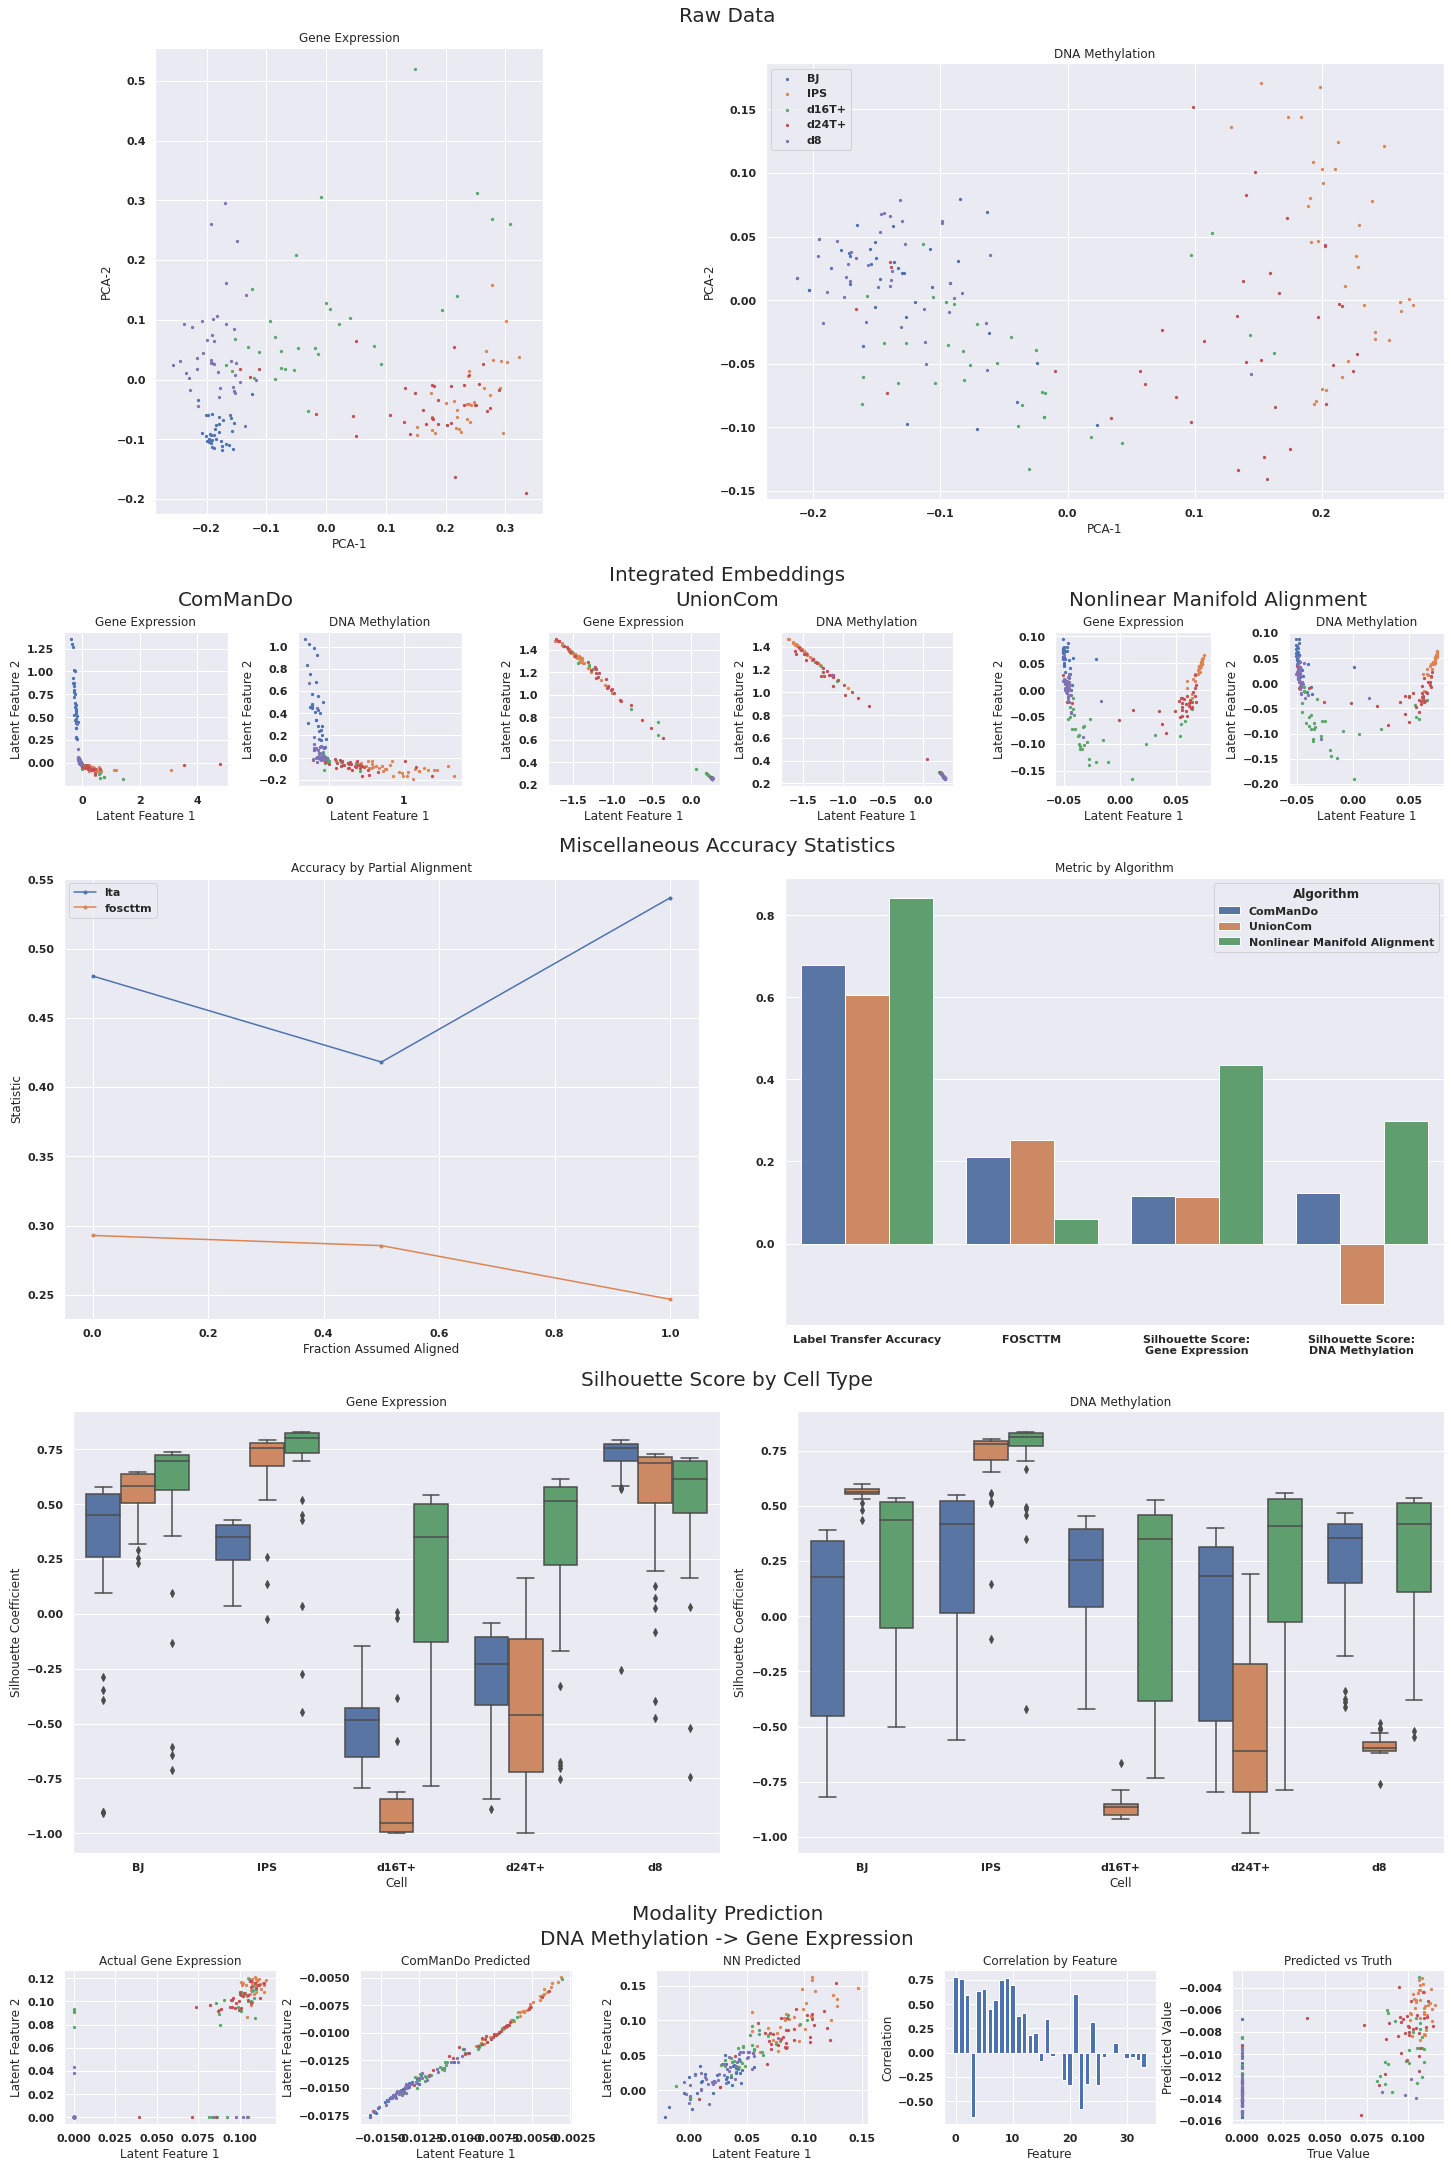

In [8]:
params = {
    'dataset_names': ['Gene Expression', 'DNA Methylation'],
    'alg_results': [uc_data, nl_data],
    'alg_names': ['UnionCom', 'Nonlinear Manifold Alignment'],
    'scale': 20,
    'reconstruction_features': {(1, 0): [8, 9]},
    'exclude_predict': [(0, 1)],
    # 'skip_partial': True,
    # 'skip_nn': True,
}
generate_figure(cm, cm_data, dataset, labels, **params)